#Import Library

In [1]:
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

# Mount File Google Drive

In [2]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df = pd.read_csv('drive/MyDrive/KAMPUS/Skripsi_AI/TLKM.JK .csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-11-27,2000.0,2010.0,1970.0,2000.0,1294.219971,80955000.0
1,2006-11-28,1950.0,1980.0,1940.0,1950.0,1261.864624,79175000.0
2,2006-11-29,1970.0,1970.0,1950.0,1970.0,1274.806396,91265000.0
3,2006-11-30,1980.0,2000.0,1960.0,1980.0,1281.277832,108440000.0
4,2006-12-01,1980.0,2000.0,1980.0,1980.0,1281.277832,42517500.0
...,...,...,...,...,...,...,...
3703,2021-11-19,3660.0,3920.0,3660.0,3900.0,3900.000000,310615000.0
3704,2021-11-22,3920.0,3930.0,3780.0,3800.0,3800.000000,206683100.0
3705,2021-11-23,3800.0,3850.0,3780.0,3800.0,3800.000000,67778800.0
3706,2021-11-24,3840.0,3840.0,3790.0,3800.0,3800.000000,67303800.0


# Check null data and fill with mean, median or modus

In [4]:
df.isna().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [5]:
df['Open'] = df['Open'].fillna(df['Open'].mean())
df['High'] = df['High'].fillna(df['High'].mean())
df['Low'] = df['Low'].fillna(df['Low'].mean())
df['Close'] = df['Close'].fillna(df['Close'].mean())
df['Adj Close'] = df['Adj Close'].fillna(df['Adj Close'].mean())
df['Volume'] = df['Volume'].fillna(df['Volume'].mean())

In [6]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Visualization the data

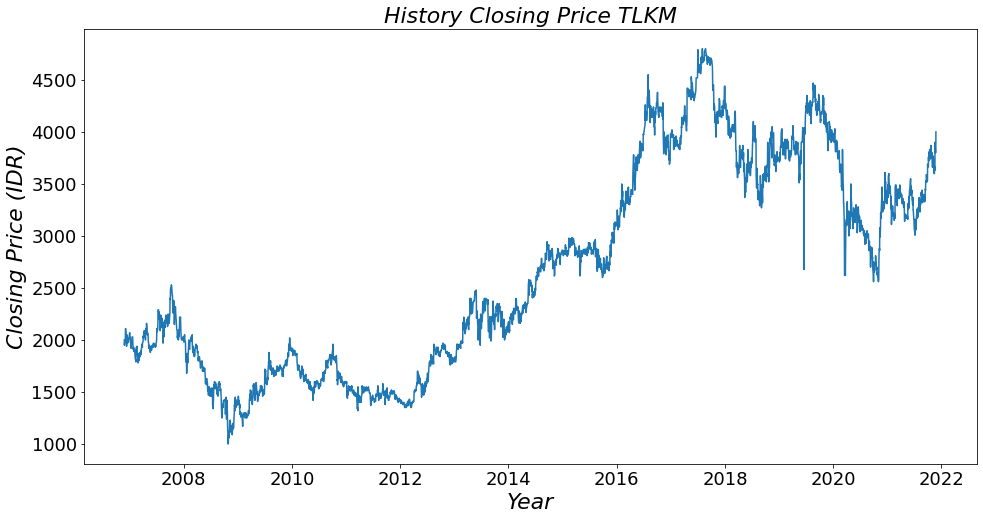

In [7]:
plt.figure(figsize=(16,8))
plt.title('History Closing Price TLKM', fontsize=22 , style='italic')
df['Date']=pd.to_datetime(df['Date'])
plt.plot(df['Date'], df['Close'])
plt.xlabel('Year', fontsize=22 , style='italic')
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.ylabel('Closing Price (IDR)', fontsize=22 , style='italic')
plt.show()

# Filter dataset

In [8]:
data = df.filter(['Close'])
dataset = data
dataset

,Close
0,2000.0
1,1950.0
2,1970.0
3,1980.0
4,1980.0
...,...
3703,3900.0
3704,3800.0
3705,3800.0
3706,3800.0


# Normalize dataset

In [9]:
sc = MinMaxScaler(feature_range=(0,1))
scaled_data = sc.fit_transform(np.array(dataset))
scaled_data

array([[0.26315789],
       [0.25      ],
       [0.25526316],
       ...,
       [0.73684211],
       [0.73684211],
       [0.78947368]])

# Split data 80% Train 20% Test

In [10]:
train_size = int(len(scaled_data) * 0.80)
test_size = len(scaled_data) - train_size
train = scaled_data[0:train_size,:]
test = scaled_data[train_size:len(scaled_data),:]
print(len(train),len(test))

2966 742


# Visualization after split

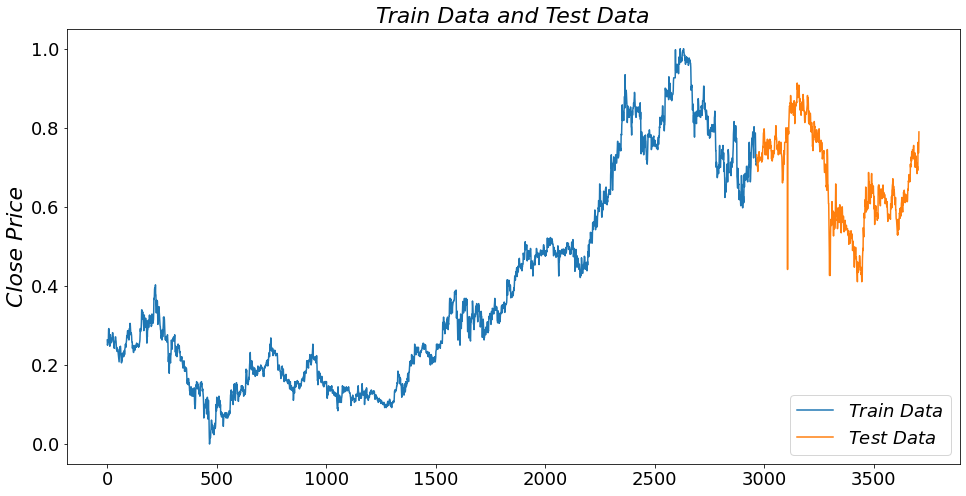

In [11]:
trainPlot = np.empty_like(dataset)
trainPlot [:,:] = np.nan
trainPlot [:len(train), :] = train
testPlot = np.empty_like(dataset)
testPlot [:,:] = np.nan
testPlot [len(train):len(dataset),:] = test
plt.figure(figsize=(16,8))
plt.title('Train Data and Test Data',fontsize=22 , style='italic')
plt.ylabel('Close Price', fontsize=22 , style='italic')
plt.plot(trainPlot) 
plt.plot(testPlot)
plt.xticks(size=18)
plt.yticks(size=18)
plt.legend(['$\it{Train\ Data}$','$\it{Test\ Data}$'], loc='lower right', fontsize=18 )
plt.show()

# Train and Reshape

In [12]:
X_train = []
Y_train = []
for i in range (60,2965):
	X_train.append(train[i-60:i, 0])
	Y_train.append(train[i, 0])

In [13]:
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Model LSTM

In [14]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True,
				input_shape = (X_train.shape [1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer = 'adam',
				loss = 'mean_absolute_error')

In [15]:
model.fit(X_train, Y_train, epochs = 10, batch_size = 64)

Epoch 1/10
46/46 [==============================] - 24s 342ms/step - loss: 0.0839
Epoch 2/10
46/46 [==============================] - 16s 342ms/step - loss: 0.0419
Epoch 3/10
46/46 [==============================] - 13s 292ms/step - loss: 0.0390
Epoch 4/10
46/46 [==============================] - 8s 180ms/step - loss: 0.0389
Epoch 5/10
46/46 [==============================] - 8s 170ms/step - loss: 0.0364
Epoch 6/10
46/46 [==============================] - 8s 171ms/step - loss: 0.0352
Epoch 7/10
46/46 [==============================] - 10s 229ms/step - loss: 0.0379
Epoch 8/10
46/46 [==============================] - 8s 170ms/step - loss: 0.0338
Epoch 9/10
46/46 [==============================] - 8s 173ms/step - loss: 0.0336
Epoch 10/10
46/46 [==============================] - 8s 172ms/step - loss: 0.0324


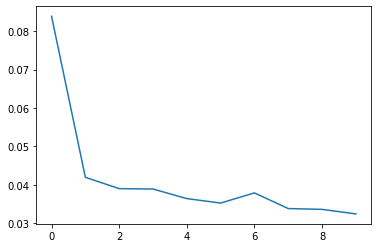

In [16]:
loss = model.history.history['loss']
plt.plot(loss)

# Get data to predict

In [17]:
df_train = pd.DataFrame(train)
df_test = pd.DataFrame(test)
total_data = pd.concat((df_train, df_test), axis=0)
inputs = total_data[len(total_data) - len(df_test) - 60:].values
print(len(inputs))

802


In [18]:
X_test = []
for i in range(60, 802):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predict dataset

In [19]:
predicted_stock_close = model.predict(X_test)
predicted_stock_close = sc.inverse_transform(predicted_stock_close)
print(len(predicted_stock_close))

742


# Compare Actual and predict

In [20]:
aktual = sc.inverse_transform(test)
aktual = pd.DataFrame(aktual)
prediction = predicted_stock_close
df_hasil = pd.DataFrame()
df_hasil['Real Price'] = aktual.astype('int')
df_hasil['Prediction'] = prediction
df_hasil

,Real Price,Prediction
0,3780,3682.434082
1,3769,3671.613281
2,3709,3658.025391
3,3670,3642.546875
4,3679,3625.771973
...,...,...
737,3900,3496.941406
738,3800,3488.524170
739,3800,3482.672607
740,3800,3480.056396


# MAPE and R² score

In [21]:
mape = np.mean(np.abs((df_hasil['Real Price'] - 
                       df_hasil['Prediction']) / 
                      df_hasil['Real Price']) * 100)
print('MAPE : '"{:.2f}".format(mape)+'%')

MAPE : 6.05%


In [22]:
r2 = r2_score(df_hasil['Real Price'], 
              df_hasil['Prediction'])
r2 = r2 * 100
print('Skor Akurasi R² : '"{:.2f}".format(r2)+' %')

Skor Akurasi R² : 66.54 %


# Visualization Real Price and Prediction

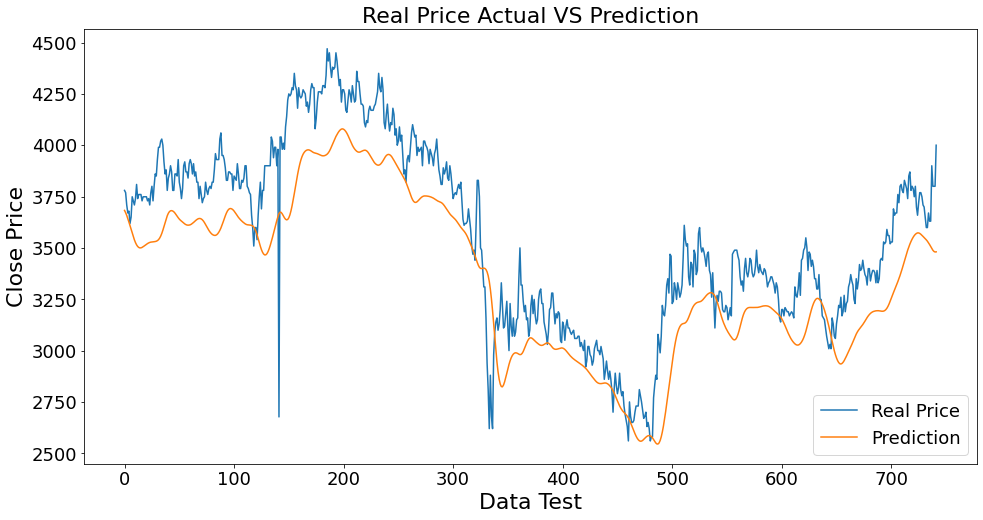

In [23]:
plt.figure(figsize=(16,8))
plt.title('Real Price Actual VS Prediction', fontsize=22)
plt.xlabel('Data Test', fontsize=22)
plt.ylabel('Close Price', fontsize=22)
plt.plot(df_hasil['Real Price'])
plt.plot(df_hasil['Prediction'])
plt.xticks(size=18)
plt.yticks(size=18)
plt.legend(['Real Price', 'Prediction'], loc='lower right',fontsize=18)
plt.show()

# Predict next n days

In [24]:
pred_inp = inputs[742:]
pred_inp = pred_inp.reshape(1,-1)
tmp_inp = list(pred_inp)
tmp_inp = tmp_inp[0].tolist()

In [27]:
list_output = []
prev_data = 60
i = 0
while(i<1):
  if(len(tmp_inp)>60):
    pred_inp = np.array(tmp_inp[1:])
    pred_inp = pred_inp.reshape(1,-1)
    pred_inp = pred_inp.reshape((1, prev_data, 1))
    prediction = model.predict(pred_inp)
    tmp_inp.extend(prediction[0].tolist())
    tmp_inp = tmp_inp[1:]
    list_output.extend(prediction.tolist())
    i = i+1
  else:
    pred_inp = pred_inp.reshape((1, prev_data,1))
    prediction = model.predict(pred_inp)
    tmp_inp.extend(prediction[0].tolist())
    list_output.extend(prediction.tolist())
    i= i+1

list_output = sc.inverse_transform(list_output)
print(f"Prediksi Harga Penutupan Saham Untuk 26 Nov 2021 : \n{list_output}")

Prediksi Harga Penutupan Saham Untuk 26 Nov 2021 : 
[[3492.70448685]]


# Real next day closing price

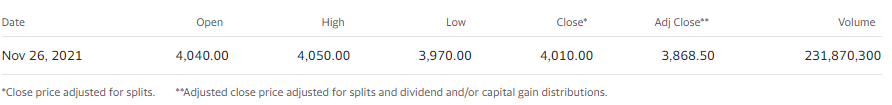

In [26]:
predicition_float = np.float64(list_output)
real_price = np.float64(4010)
if(real_price>predicition_float):
  similar = (predicition_float/real_price)*100
else:
  similar = (real_price/predicition_float)*100
print('MAPE : '"{:.2f}".format(mape)+'%')
print('Skor Akurasi R² : '"{:.2f}".format(r2)+' %')
print('\nTingkat Kesamaan : '"{:.2f}".format(similar)+' %')

MAPE : 6.05%
Skor Akurasi R² : 66.54 %

Tingkat Kesamaan : 86.93 %


# Try to predict 30 days ahead

In [ ]:
pred = inputs[742:]
pred = pred.reshape(1,-1)
tmp = list(pred)
tmp = tmp[0].tolist()

In [ ]:
list_out = []
prev_step = 60
j = 0
while(j<30):
  if(len(tmp_inp)>60):
    pred_inp = np.array(tmp_inp[1:])
    pred_inp = pred_inp.reshape(1,-1)
    pred_inp = pred_inp.reshape((1, prev_step, 1))
    prediction = model.predict(pred_inp)
    tmp_inp.extend(prediction[0].tolist())
    tmp_inp = tmp_inp[1:]
    list_out.extend(prediction.tolist())
    j = j+1
  else:
    pred_inp = pred_inp.reshape((1, prev_step,1))
    prediction = model.predict(pred_inp)
    tmp_inp.extend(prediction[0].tolist())
    list_out.extend(prediction.tolist())
    j= j+1

list_out = sc.inverse_transform(list_out)
print(list_out)

[[3988.56265545]
 [4005.27591705]
 [4020.37357092]
 [4034.82027054]
 [4047.51546383]
 [4059.07839537]
 [4069.86036301]
 [4080.22444248]
 [4090.32465219]
 [4100.24162531]
 [4110.02202034]
 [4119.71068382]
 [4129.34929132]
 [4138.96796703]
 [4148.58279228]
 [4158.19625854]
 [4167.80338287]
 [4177.39374638]
 [4186.95760965]
 [4196.48681879]
 [4205.97412586]
 [4215.41318893]
 [4224.79947805]
 [4234.12914276]
 [4243.3983326 ]
 [4252.60523558]
 [4261.74803972]
 [4270.82538605]
 [4279.83614206]
 [4288.77985477]]


In [ ]:
datastack = np.vstack((predicted_stock_close,list_out))

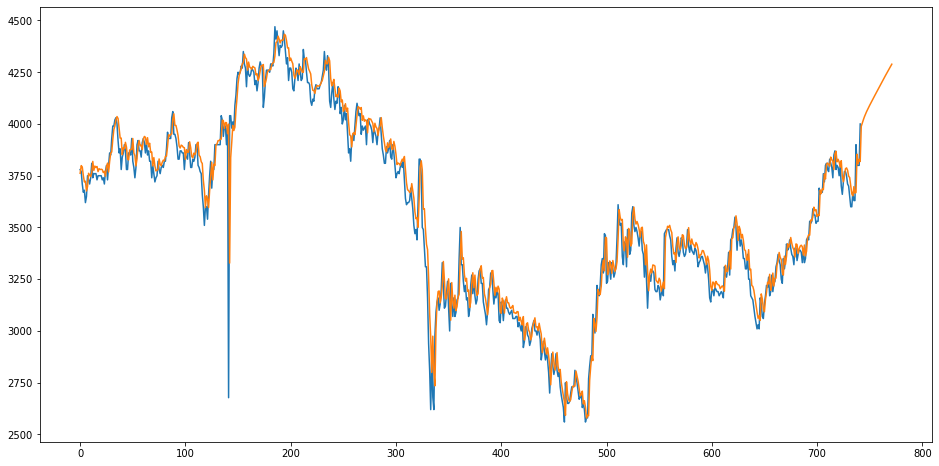

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(aktual)
plt.plot(datastack)

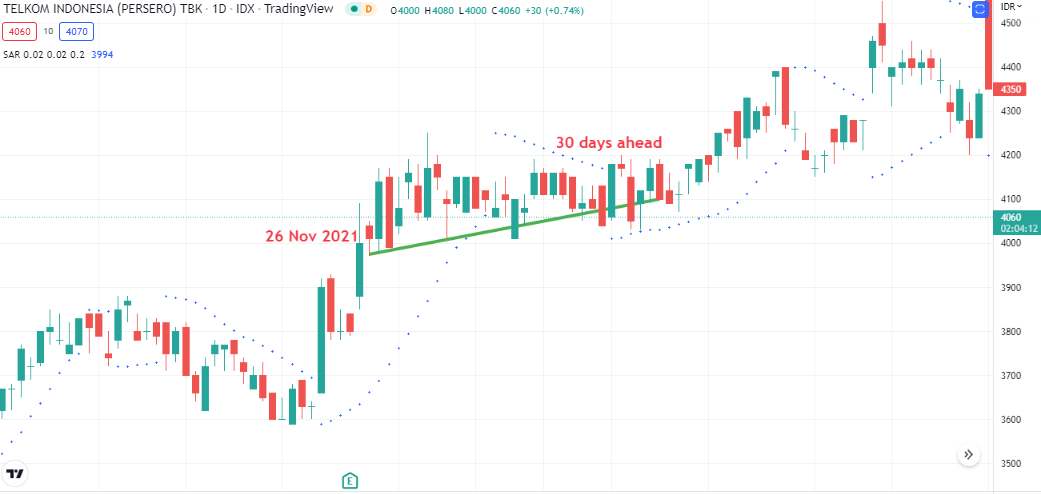

# Save Model Predicition

In [ ]:
# from google.colab import files
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#   json_file.write(model_json)
# # files.download("model.json")
# model.save('weights.h5')
# # files.download('weights.h5')